### Random Forest Classifier

In [11]:
import numpy as np
import pandas as pd

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# metricas
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Para plotar a curva Roc
import scikitplot as skplt
import matplotlib.pyplot as plt

### Lendo a base de dados

In [2]:
X = pd.read_csv("./data/preprocessamento/X.csv", index_col=0)
y = pd.read_csv("./data/preprocessamento/y.csv", header=None, index_col=0)

In [ ]:
# Divindo treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

### CV

In [4]:
param = [{'n_estimators': 10, 'criterion': 'gini', 'min_samples_split': 2},
        {'n_estimators': 50, 'criterion': 'gini', 'min_samples_split': 2},
        {'n_estimators': 100, 'criterion': 'gini', 'min_samples_split': 2},
        {'n_estimators': 50, 'criterion': 'gini', 'min_samples_split': 5},
        {'n_estimators': 50, 'criterion': 'gini', 'min_samples_split': 10},
        {'n_estimators': 50, 'criterion': 'gini', 'min_samples_split': 30},
        {'n_estimators': 100, 'criterion': 'gini', 'min_samples_split': 5},
        {'n_estimators': 100, 'criterion': 'gini', 'min_samples_split': 10},
        {'n_estimators': 100, 'criterion': 'gini', 'min_samples_split': 30},
        {'n_estimators': 100, 'criterion': 'entropy', 'min_samples_split': 10},
        {'n_estimators': 50, 'criterion': 'entropy', 'min_samples_split': 10}]


for p in param:
    clf = RandomForestClassifier(**p)
    cv_scores = cross_val_score(clf, X, y[1], cv=10)
    
    print(p)
    print(cv_scores)

{'n_estimators': 10, 'criterion': 'gini', 'min_samples_split': 2}
[0.69708738 0.67864078 0.68466019 0.70033016 0.67954943 0.70071859
 0.68323946 0.68376068 0.68298368 0.68900544]
{'n_estimators': 50, 'criterion': 'gini', 'min_samples_split': 2}
[0.71902913 0.6984466  0.7038835  0.71295397 0.70207807 0.70984657
 0.69838804 0.6981352  0.6969697  0.70376845]
{'n_estimators': 100, 'criterion': 'gini', 'min_samples_split': 2}
[0.72097087 0.6984466  0.70524272 0.71392503 0.70168965 0.71275976
 0.70382599 0.70066045 0.70765346 0.7000777 ]
{'n_estimators': 50, 'criterion': 'gini', 'min_samples_split': 5}
[0.72737864 0.70893204 0.71417476 0.71780928 0.70906972 0.71625558
 0.71140027 0.70959596 0.71037296 0.70532246]
{'n_estimators': 50, 'criterion': 'gini', 'min_samples_split': 10}
[0.72601942 0.71572816 0.71398058 0.72130511 0.70965236 0.71722665
 0.70984657 0.70843046 0.71794872 0.71076146]
{'n_estimators': 50, 'criterion': 'gini', 'min_samples_split': 30}
[0.72757282 0.71320388 0.71553398 0.

### Treino com melhor classificador

In [5]:
# Divindo treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [7]:
# Melhor parametro
clf = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=30)

clf.fit(X_train, y_train)

/home/demenezes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Resultados na base de teste

Acuracia:  0.7208097928436912


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


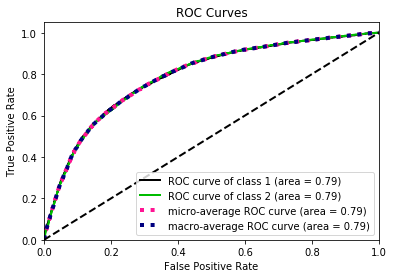

In [12]:
# Acuracia na base de teste
y_pred = clf.predict(X_test)
y_prob =  clf.predict_proba(X_test)

print("Acuracia: ", accuracy_score(y_test, y_pred))

# Curva Roc
skplt.metrics.plot_roc_curve(y_test, y_prob)
plt.show()